In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\Lenovo\SSN Study Materials\ML - Prema\Air Quality 02.xlsx')

In [3]:
df

,Date,Time,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,NaN,NaN
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,NaN,NaN
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,NaN,NaN
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9357 non-null   datetime64[ns]
 1   Time         9357 non-null   object        
 2   COGT         9357 non-null   float64       
 3   PT08S1CO     9357 non-null   float64       
 4   NMHCGT       9357 non-null   int64         
 5   C6H6GT       9357 non-null   float64       
 6   PT08S2NMHC   9357 non-null   float64       
 7   NOxGT        9357 non-null   float64       
 8   PT08S3NOx    9357 non-null   float64       
 9   NO2GT        9357 non-null   float64       
 10  PT08S4NO2    9357 non-null   float64       
 11  PT08S5O3     9357 non-null   float64       
 12  T            9357 non-null   float64       
 13  RH           9357 non-null   float64       
 14  AH           9357 non-null   float64       
 15  Unnamed: 15  0 non-null      float64       
 16  Unname

In [5]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16', 'NMHCGT'], axis=1)

In [6]:
df

,Date,Time,COGT,PT08S1CO,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        9357 non-null   datetime64[ns]
 1   Time        9357 non-null   object        
 2   COGT        9357 non-null   float64       
 3   PT08S1CO    9357 non-null   float64       
 4   C6H6GT      9357 non-null   float64       
 5   PT08S2NMHC  9357 non-null   float64       
 6   NOxGT       9357 non-null   float64       
 7   PT08S3NOx   9357 non-null   float64       
 8   NO2GT       9357 non-null   float64       
 9   PT08S4NO2   9357 non-null   float64       
 10  PT08S5O3    9357 non-null   float64       
 11  T           9357 non-null   float64       
 12  RH          9357 non-null   float64       
 13  AH          9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


In [8]:
df.isnull().sum()

Date          0
Time          0
COGT          0
PT08S1CO      0
C6H6GT        0
PT08S2NMHC    0
NOxGT         0
PT08S3NOx     0
NO2GT         0
PT08S4NO2     0
PT08S5O3      0
T             0
RH            0
AH            0
dtype: int64

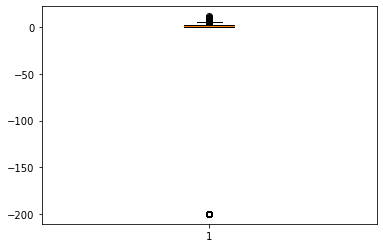

In [9]:
plt.boxplot(df['COGT'])
plt.show()

In [10]:
#For column COGT
Q1_COGT = df.COGT.quantile(0.25)
Q3_COGT = df.COGT.quantile(0.75)
IQR_COGT = Q3_COGT-Q1_COGT

lower_limit_COGT = Q1_COGT-1.5*IQR_COGT
upper_limit_COGT = Q3_COGT+1.5*IQR_COGT
b_COGT = upper_limit_COGT

for x in ['COGT']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_COGT
    df.loc[df[x] > max,x] = b_COGT

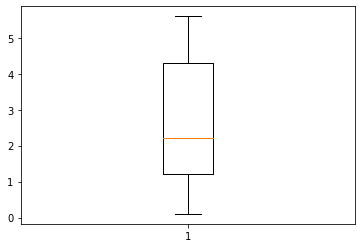

In [11]:
plt.boxplot(df['COGT'])
plt.show()

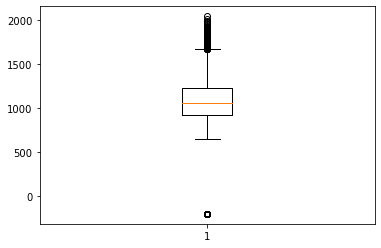

In [12]:
plt.boxplot(df['PT08S1CO'])
plt.show()

In [13]:
#For column PT08S1CO
Q1_PT08S1CO = df.PT08S1CO.quantile(0.25)
Q3_PT08S1CO = df.PT08S1CO.quantile(0.75)
IQR_PT08S1CO = Q3_PT08S1CO-Q1_PT08S1CO

lower_limit_PT08S1CO = Q1_PT08S1CO-1.5*IQR_PT08S1CO
upper_limit_PT08S1CO = Q3_PT08S1CO+1.5*IQR_PT08S1CO
b_PT08S1CO = upper_limit_PT08S1CO

for x in ['PT08S1CO']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_PT08S1CO
    df.loc[df[x] > max,x] = b_PT08S1CO

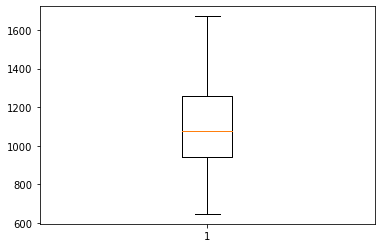

In [14]:
plt.boxplot(df['PT08S1CO'])
plt.show()

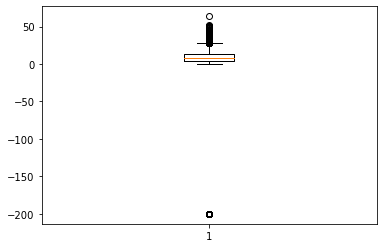

In [15]:
plt.boxplot(df['C6H6GT'])
plt.show()

In [16]:
#For column C6H6GT
Q1_C6H6GT = df.C6H6GT.quantile(0.25)
Q3_C6H6GT = df.C6H6GT.quantile(0.75)
IQR_C6H6GT = Q3_C6H6GT-Q1_C6H6GT

lower_limit_C6H6GT = Q1_C6H6GT-1.5*IQR_C6H6GT
upper_limit_C6H6GT = Q3_C6H6GT+1.5*IQR_C6H6GT
b_C6H6GT = upper_limit_C6H6GT

for x in ['C6H6GT']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_C6H6GT
    df.loc[df[x] > max,x] = b_C6H6GT


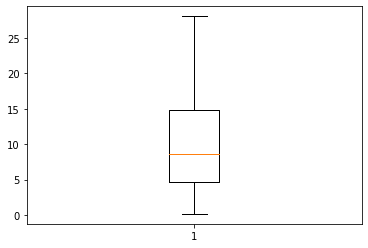

In [17]:
plt.boxplot(df['C6H6GT'])
plt.show()

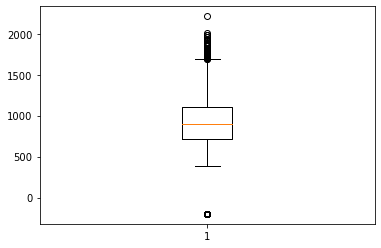

In [18]:
plt.boxplot(df['PT08S2NMHC'])
plt.show()

In [19]:
#For column PT08S2NMHC
Q1_PT08S2NMHC = df.PT08S2NMHC.quantile(0.25)
Q3_PT08S2NMHC = df.PT08S2NMHC.quantile(0.75)
IQR_PT08S2NMHC = Q3_PT08S2NMHC-Q1_PT08S2NMHC

lower_limit_PT08S2NMHC = Q1_PT08S2NMHC-1.5*IQR_PT08S2NMHC
upper_limit_PT08S2NMHC = Q3_PT08S2NMHC+1.5*IQR_PT08S2NMHC
b_PT08S2NMHC = upper_limit_PT08S2NMHC

for x in ['PT08S2NMHC']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_PT08S2NMHC
    df.loc[df[x] > max,x] = b_PT08S2NMHC


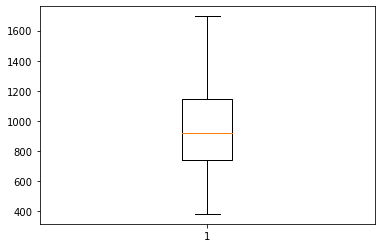

In [20]:
plt.boxplot(df['PT08S2NMHC'])
plt.show()

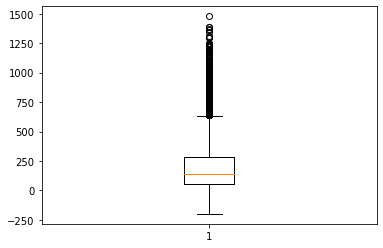

In [21]:
plt.boxplot(df['NOxGT'])
plt.show()

In [22]:
#For column NOxGT
Q1_NOxGT = df.NOxGT.quantile(0.25)
Q3_NOxGT = df.NOxGT.quantile(0.75)
IQR_NOxGT = Q3_NOxGT-Q1_NOxGT

lower_limit_NOxGT = Q1_NOxGT-1.5*IQR_NOxGT
upper_limit_NOxGT = Q3_NOxGT+1.5*IQR_NOxGT
b_NOxGT = upper_limit_NOxGT

for x in ['NOxGT']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_NOxGT
    df.loc[df[x] > max,x] = b_NOxGT


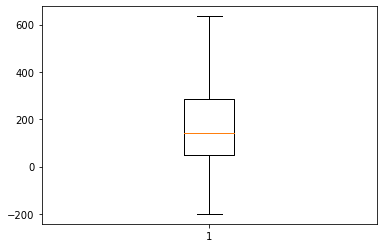

In [23]:
plt.boxplot(df['NOxGT'])
plt.show()

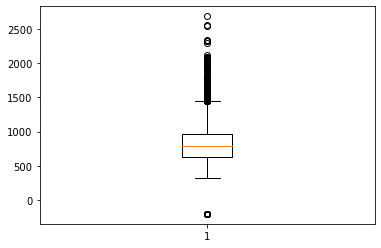

In [24]:
plt.boxplot(df['PT08S3NOx'])
plt.show()

In [25]:
#For column PT08S3NOx
Q1_PT08S3NOx = df.PT08S3NOx.quantile(0.25)
Q3_PT08S3NOx = df.PT08S3NOx.quantile(0.75)
IQR_PT08S3NOx = Q3_PT08S3NOx-Q1_PT08S3NOx

lower_limit_PT08S3NOx = Q1_PT08S3NOx-1.5*IQR_PT08S3NOx
upper_limit_PT08S3NOx = Q3_PT08S3NOx+1.5*IQR_PT08S3NOx
b_PT08S3NOx = upper_limit_PT08S3NOx

for x in ['PT08S3NOx']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_PT08S3NOx
    df.loc[df[x] > max,x] = b_PT08S3NOx


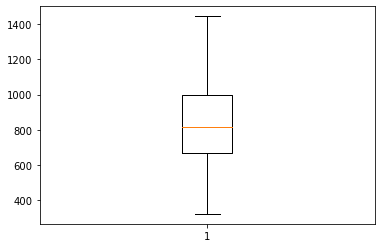

In [26]:
plt.boxplot(df['PT08S3NOx'])
plt.show()

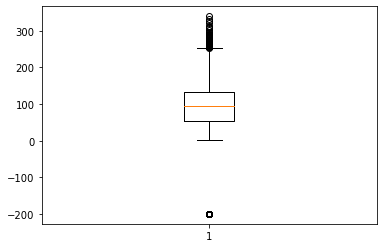

In [27]:
plt.boxplot(df['NO2GT'])
plt.show()

In [28]:
#For column NO2GT
Q1_NO2GT = df.NO2GT.quantile(0.25)
Q3_NO2GT = df.NO2GT.quantile(0.75)
IQR_NO2GT = Q3_NO2GT-Q1_NO2GT

lower_limit_NO2GT = Q1_NO2GT-1.5*IQR_NO2GT
upper_limit_NO2GT = Q3_NO2GT+1.5*IQR_NO2GT
b_NO2GT = upper_limit_NO2GT

for x in ['NO2GT']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_NO2GT
    df.loc[df[x] > max,x] = b_NO2GT


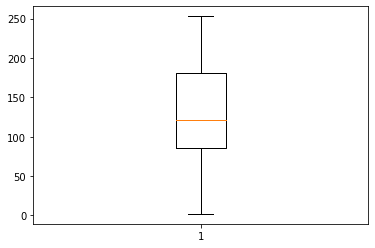

In [29]:
plt.boxplot(df['NO2GT'])
plt.show()

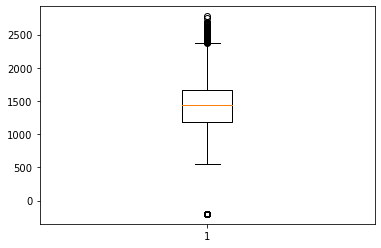

In [30]:
plt.boxplot(df['PT08S4NO2'])
plt.show()

In [31]:
#For column PT08S4NO2
Q1_PT08S4NO2 = df.PT08S4NO2.quantile(0.25)
Q3_PT08S4NO2 = df.PT08S4NO2.quantile(0.75)
IQR_PT08S4NO2 = Q3_PT08S4NO2-Q1_PT08S4NO2

lower_limit_PT08S4NO2 = Q1_PT08S4NO2-1.5*IQR_PT08S4NO2
upper_limit_PT08S4NO2 = Q3_PT08S4NO2+1.5*IQR_PT08S4NO2
b_PT08S4NO2 = upper_limit_PT08S4NO2

for x in ['PT08S4NO2']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_PT08S4NO2
    df.loc[df[x] > max,x] = b_PT08S4NO2


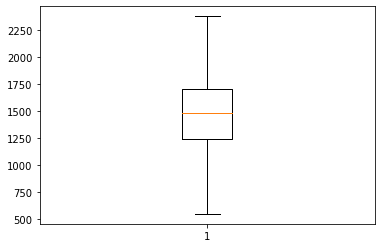

In [32]:
plt.boxplot(df['PT08S4NO2'])
plt.show()

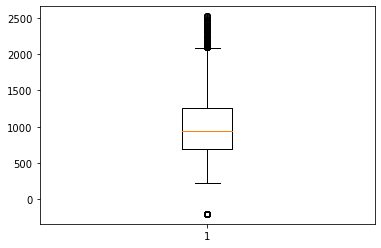

In [33]:
plt.boxplot(df['PT08S5O3'])
plt.show()

In [34]:
#For column PT08S5O3
Q1_PT08S5O3 = df.PT08S5O3.quantile(0.25)
Q3_PT08S5O3 = df.PT08S5O3.quantile(0.75)
IQR_PT08S5O3 = Q3_PT08S5O3-Q1_PT08S5O3

lower_limit_PT08S5O3 = Q1_PT08S5O3-1.5*IQR_PT08S5O3
upper_limit_PT08S5O3 = Q3_PT08S5O3+1.5*IQR_PT08S5O3
b_PT08S5O3 = upper_limit_PT08S5O3

for x in ['PT08S5O3']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_PT08S5O3
    df.loc[df[x] > max,x] = b_PT08S5O3


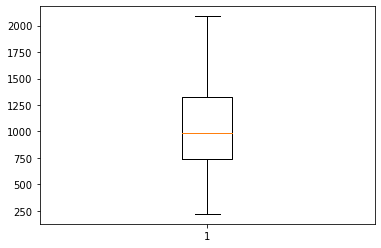

In [35]:
plt.boxplot(df['PT08S5O3'])
plt.show()

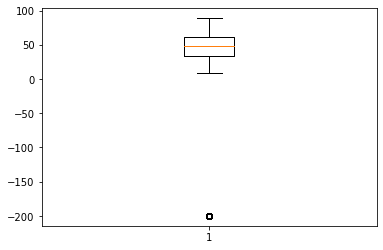

In [36]:
plt.boxplot(df['RH'])
plt.show()

In [37]:
#For column RH
Q1_RH = df.RH.quantile(0.25)
Q3_RH = df.RH.quantile(0.75)
IQR_RH = Q3_RH-Q1_RH

lower_limit_RH = Q1_RH-1.5*IQR_RH
upper_limit_RH = Q3_RH+1.5*IQR_RH
b_RH = upper_limit_RH

for x in ['RH']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_RH
    df.loc[df[x] > max,x] = b_RH

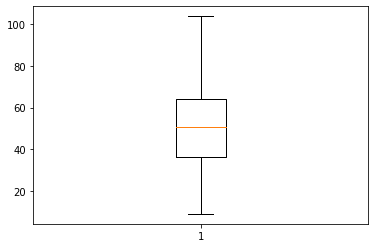

In [38]:
plt.boxplot(df['RH'])
plt.show()

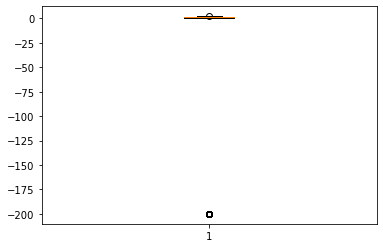

In [39]:
plt.boxplot(df['AH'])
plt.show()

In [40]:
#For column AH
Q1_AH = df.AH.quantile(0.25)
Q3_AH = df.AH.quantile(0.75)
IQR_AH = Q3_AH-Q1_AH

lower_limit_AH = Q1_AH-1.5*IQR_AH
upper_limit_AH = Q3_AH+1.5*IQR_AH
b_AH = upper_limit_AH

for x in ['AH']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_AH
    df.loc[df[x] > max,x] = b_AH

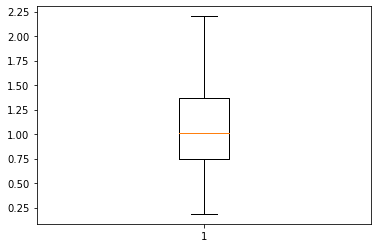

In [41]:
plt.boxplot(df['AH'])
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        9357 non-null   datetime64[ns]
 1   Time        9357 non-null   object        
 2   COGT        9357 non-null   float64       
 3   PT08S1CO    9357 non-null   float64       
 4   C6H6GT      9357 non-null   float64       
 5   PT08S2NMHC  9357 non-null   float64       
 6   NOxGT       9357 non-null   float64       
 7   PT08S3NOx   9357 non-null   float64       
 8   NO2GT       9357 non-null   float64       
 9   PT08S4NO2   9357 non-null   float64       
 10  PT08S5O3    9357 non-null   float64       
 11  T           9357 non-null   float64       
 12  RH          9357 non-null   float64       
 13  AH          9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


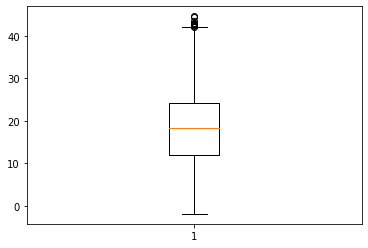

In [43]:
plt.boxplot(df['T'])
plt.show()

In [44]:
#For column T
Q1_T = df.T.quantile(0.25)
Q3_T = df.T.quantile(0.75)
IQR_T = Q3_T-Q1_T

lower_limit_T = Q1_T-1.5*IQR_T
upper_limit_T = Q3_T+1.5*IQR_T
b_T = upper_limit_T

for x in ['T']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_T
    df.loc[df[x] > max,x] = b_T


In [45]:
df.isnull().sum()

Date           0
Time           0
COGT           0
PT08S1CO       0
C6H6GT         0
PT08S2NMHC     0
NOxGT          0
PT08S3NOx      0
NO2GT          0
PT08S4NO2      0
PT08S5O3       0
T             12
RH             0
AH             0
dtype: int64

In [46]:
df['T'].fillna(df['T'].mode()[0], inplace=True)

In [47]:
df.isnull().sum()

Date          0
Time          0
COGT          0
PT08S1CO      0
C6H6GT        0
PT08S2NMHC    0
NOxGT         0
PT08S3NOx     0
NO2GT         0
PT08S4NO2     0
PT08S5O3      0
T             0
RH            0
AH            0
dtype: int64

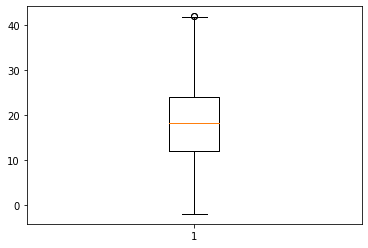

In [48]:
plt.boxplot(df['T'])
plt.show()

In [49]:
df

,Date,Time,COGT,PT08S1CO,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [50]:
#df.to_excel("Air Quality Preprocessed.xlsx")
